# Moments and Likelihood
### Understanding Uncertainty

## Introduction
- We've done a lot of work on probability, distributions, and densities
- These notes show how to estimate models in two ways:
    1. Show how the ECDF/CDF and KDE/PDF are related
    2. Introduce Maximum Likelihood Estimation
- MLE is a massive field, so we're going to keep things concrete and work out equations and situations by hand

## Roadmap
1. Key Moments
2. Random Vectors
3. Likelihood Estimation

# 1. Key Moments

## Expectation
- So we have a probability space $(\mathcal{Z}, \mathcal{E}, p)$ and a random variable $X: \mathcal{Z} \rightarrow \mathbb{R}$
- These yield a distribution function $F_X(x) = p(\{z\in \mathcal{Z}:X(z)\le x\})$ and density $f_X(x)=F_X'(x)$
- What now?
- The **Expected Value** or **Expectation** of a random variable $X$ is
$$
\mathbb{E}[X] = \begin{cases} \int_{x \in \text{supp}(X)} x \times f_X(x)dx, & \text{$X$ continuous}\\
\sum_{x \in \text{supp}(X)} x \times m_X(x), & \text{$X$ discrete}.
\end{cases}
$$
- We often write $\mu_X$ for the expectation of $X$
- This is one of the most important quantities in probability and statistics

## Exercises
- What is the expected value of a single die roll? 
- Rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?


## Where does $\mathbb{E}[X]$ come from?
- Imagine you want to predict $X$. You are going to decide how badly you failed by computing the loss $-(x-\hat{x})^2$ for the realized value of $X=x$. 
- Since $f_X(x)$ weights each $X=x$ by the likelihood it occurs, it makes sense to minimize the expected squared error:
$$
\min_{\hat{x}} \mathbb{E}[(X-\hat{x})^2]= \min_{\hat{x}} \int_{x} (x - \hat{x})^2 f_X(x) dx
$$
- Take the derivative and set it equal to zero:
$$
\int_{x} -2(x - \hat{x}) f_X(x) dx = 0,
$$
and solve:
$$
\hat{x} = \int_x x f_X(x)dx = \mathbb{E}[X]
$$
- The expectation $\mathbb{E}[X]$ is the optimal least squares predictor of $X$
- Minimizing expected loss is the core idea of machine learning

## What is the Expectation?
- You are a data scientist, so what does the expectation "mean" to you?
- We are investigating how our models work, **before** we gather the data
- How do we **expect** a model to behave? 
- In this case of minimizing squared loss, what is our optimal prediction $\hat{x}$? It's the expected value of $X$

## Exercise: Properties of the Expectation
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show that if $X$ has distribution $F_X(x)$, then $Y = a+bX$ has distribution $F_Y(y) = F_X( (y-a)/b)$ and density $f_Y(y) = f_X((y-a)/b)/b$, if $b>0$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a normally distributed random variable. This is a very important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

## Variance
- If we plug our estimate $\hat{y} = \mathbb{E}[X]$ back into the objective function $\int (x-\hat{x})^2 f_X(x)dx$, we get the  **Variance of $X$**:
$$
\mathbb{V}[X] = \int_{x} (x - \mathbb{E}[X])^2 f(x) dx
$$
- This is the expected squared error if we try to predict the value of $X$ by selecting the optimal $\hat{x} = \mathbb{E}[X]$
- We often write $\sigma_X^2$ for the variance of $X$

## What is the Variance?
- Our backgrounds in stats tempt us to say, "the variance is a measure of how uncertain $X$ is," which is true
- As data scientists, we have an additional interpretation: "If your loss is $L(e)=e^2$ and you predict $\hat{x} = \mathbb{E}[X]$, what is your expected loss? How wrong do you expect to be?"
- So, before we gather our data, how wrong do we expect to be if we predict $\hat{x} = \mathbb{E}[X]$?

## Exercise: Properties of the Variance
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


## Exercise: Decomposing a Random Variable
- Suppose $X$ has an expectation $\mathbb{E}[X]$ and variance $\mathbb{V}[X]$
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

## Example: Indicator Functions
- 🎶 *Hello darkness, my old friend...* 🎶
- Let
$$
\mathbb{I}\{ x \in A \} = \begin{cases}
0, & x \notin A \\
1, & x \in A
\end{cases}
$$
- What is the expectation of an indicator function? 
- Let's start simple: Whenever the indicator is 1, we integrate over $f_X(x)$, and otherwise we integrate over 0:
$$
\mathbb{E}_X[ \mathbb{I}\{ X \le x \} ] = \int_{-\infty}^x 1 f_X(z)dz + \int_{x}^\infty 0 f_X(z)dz  = F_X(x)
$$
- Exercise: What is $\mathbb{E}_X[ \mathbb{I}\{ X > x \} ]$?
- The expected value of an indicator function for the set $A$ is probability of the event $A$: $\int_{x \in A}f(x)dx = p(\{z\in \mathcal{Z}:X(z) \in A\})$

## ECDF to CDF
- Let's take a look at what happens when we take the expectation of our ECDF:
\begin{alignat*}{2}
\mathbb{E}[\hat{F}_X(x)] &=& \mathbb{E}\left[ \frac{1}{N} \sum_{i=1}^N \mathbb{I}\{x_i \le X \} \right] \quad (\text{Definition})\\
&=&  \frac{1}{N} \sum_{i=1}^N \mathbb{E}\left[\mathbb{I}\{x_i \le x \} \right] \quad (\text{Swap sum and expectation})\\
&=&  \frac{1}{N} \sum_{i=1}^N \mathbb{E}\left[\mathbb{I}\{X \le x \} \right] \quad (\text{The $x_i$ is the RV here, so swap notation})\\
&=&  \frac{1}{N} \sum_{i=1}^N F_X(x) \quad (\text{Expectation of indicator is probability})\\
&=&  \frac{1}{N} \underbrace{(F_X(x)+F_X(x)+...+F_X(x))}_{\text{$N$ times}} \\
&=&  F_X(x) \\
\end{alignat*}
- The expected value of the ECDF is the CDF; the ECDF is an **unbiased estimator** of the CDF. We think the ECDF is always a good -- but potentially noisy -- estimate of the true distribution.
- So, even before we gather our data, we **expect** the ECDF to be a good estimator of the true CDF.

## KDE to PDF
- Let's look at the KDE:
$$
\mathbb{E}[ \hat{f}_{X,h}(x)] = \mathbb{E} \left[ \dfrac{1}{N} \sum_{i=1}^N \frac{1}{2h} \mathbb{I}\{ |x_i -x| \le h\} \right] = \dfrac{1}{N} \sum_{i=1}^N \mathbb{E}_X \left[ \frac{1}{2h} \mathbb{I}\{ |X -x| \le h\} \right]
$$
- Now take the expectation of the indicator:
$$
\mathbb{E}[ \hat{f}_{X,h}(x)] = \dfrac{1}{N} \sum_{i=1}^N \mathbb{E} \left[ \frac{1}{2h} \mathbb{I}\{ |X -x| \le h\} \right] = \dfrac{1}{N} \sum_{i=1}^N \dfrac{F(x+h) - F(x-h)}{2h}
$$
- Notice that the $1/N$ and the sum "cancel out", and we get:
$$
\mathbb{E}[ \hat{f}_{X,h} (x)] = \dfrac{F(x+h) - F(x-h)}{2h}
$$


## KDE to PDF
- This isn't quite $f(x)$: We have a slight **bias** in our expected value of the kde, but it's shrinking in $h$, since $F'(x)=f(x)$.
- So taking the limit as $h \rightarrow 0$,
$$
\lim_{h \rightarrow 0} \mathbb{E}[ \hat{f}_{X,h} (x)] = \lim_{h \rightarrow 0} \dfrac{F(x+h) - F(x-h)}{2h} = f(x)
$$
- So our KDE estimates the density as $h\rightarrow 0$. In general, the KDE is a biased but consistent estimator of the true pdf (as $N\rightarrow \infty$ and $hN\rightarrow \infty$ and $h \rightarrow 0$ at the right rate, it will get closer and closer to the truth)

## Exercise: Bias of the KDE
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + (x+h-x)f'(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) + ( (x-h)-x)f'(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$. 

## ECDF/CDF, KDE/PDF
- So this whole time, we've been estimating the underlying densities and distributions of dozens of random variables just by visualizing them
- What connects these objects, mathematically? The expectation of the indicator function is a probability
- The expectation operator is the bridge from our theory to our likely results

# 2. Random Vectors

## Random Vectors
- So far, we've dealt with a random variable $X: \mathcal{Z} \rightarrow \mathbb{R}$
- An $n$-dimensional random vector is a mapping $X: \mathcal{Z} \rightarrow \mathbb{R} \times \mathbb{R} \times... \times \mathbb{R} = \mathbb{R}^n$
- This is much harder than one dimension: We want to track how random variables move together
- We want to point out when this concept is interesting... but we're mainly interested in the boring cases

## Joint Distribution and Density
- The distribution function for $(X_1, ..., X_N)$ is given by
$$
F_{X_1, X_2, ... , X_N}(x_1, x_2, ..., x_N) = \mathbb{P}\left( \{ z \in \mathcal{Z} : X_1 \le x_1, X_2 \le x_2, ..., X_N \le x_n \} \right),
$$
and the density function is given by
$$
f_{X_1, X_2, ... , X_N}(x_1, x_2, ..., x_N) = \dfrac{\partial ^N F_{X_1, X_2, ... , X_N}(x_1, x_2, ..., x_N)}{\partial x_1 \partial x_2 ... \partial x_N},
$$
- These aren't very expressive or intuitive. What we want to know is, how do these variables "move together"?

## Independence
- Before we dive into non-trivial examples of random vectors, we have a nice edge case: If it's true that
$$
f_{X_1, X_2, ..., X_n}(x_1, x_2, ..., x_n) = f_{X_1}(x_1) \times f_{X_2}(x_2) \times ... \times f_{X_n}(x_n)
$$
then we say that $(X_1,...,X_n)$ are **independent random variables**
- We are basically saying that the realizations of each random variable $X_i$ are unrelated to the realizations of the others
- For example, flip a coin and then flip it again: Independence
- We typically write this as
$$
f_{X_1, X_2, ..., X_n}(x_1, x_2, ..., x_n) = \prod_{i=1}^n f_{X_i}(x_i)
$$



## Exercise: Covariance and Independence
- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{x,y} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases

## Exercise: Markov Chains and Independence
- An example of a **continuous state Markov chain** is the **autoregressive process** or AR(1):
$$
x_{t+1} = \beta x_t + \sigma \varepsilon_t,
$$
where $\varepsilon_t$ is distributed $\text{Normal}(0,1)$
- What are the mean and variance of $X_{t+1}$?
- What's the distribution of $X_{t+1}$?
- Spatial and temporal correlation is crucial for modern data science

## Bivariate Normal
- Let's start with something concrete: A pair of variables $(X,Y)$ over the same probability space, having a **bivariate normal distribution**
- It would not be very interesting to have $f_{XY}(x,y) = f_X(x)f_Y(y)$: That's just two normals living in the same space, with no connection. We want $X$ and $Y$ to carry information about one another. This complexity comes at a cost
- The bivariate normal density function is:
$$
f_{XY}(x,y) = \dfrac{1}{2 \pi \sqrt{1-\rho^2} \sigma_x \sigma_y} \exp \left\lbrace - \frac{1}{2(1-\rho^2)} \left[ \left( \frac{x-\mu_X}{\sigma_X}\right)^2 + \left( \frac{y-\mu_Y}{\sigma_Y}\right)^2 - 2 \rho \frac{(x-\mu_X)(y-\mu_Y)}{\sigma_X \sigma_Y} \right] \right\rbrace
$$
where $\sigma_X, \sigma_Y > 0$ and $-1 < \rho <1 $

## Bivariate Normal
- Slightly less hideous: Letting $z = [x,y]^{\top}$ and $\mu = [\mu_X, \mu_Y]^{\top}$,
$$
f_{z}(z) = \dfrac{1}{\sqrt{(2\pi)^2 \det(\Sigma)}} \exp \left\lbrace - \frac{(z-\mu)^{\top} \Sigma^{-1}(z-\mu)}{2}\right\rbrace
$$
where
$$
\Sigma = \left[ \begin{array}{cc} \sigma_X^2 & \rho \sigma_X \sigma_Y \\ \rho \sigma_X \sigma_Y & \sigma_Y^2 \end{array}\right]
$$
- If you squint, it's as if you're substituting $(x-\mu)/\sigma$ in the one-dimensional version for $ (z-\mu)^{\top} \Sigma^{-1}(z-\mu)$, and $1/\sigma$ for $1/\det(\Sigma)$


## Multivariate Normal
- This equation generalizes to the general pdf for a multivariate normal in $n$ dimensions:
$$
f_X(x_1, ..., x_N) = \dfrac{1}{\sqrt{(2\pi)^n \det(\Sigma)}} \exp \left\lbrace - \frac{(z-\mu)^{\top} \Sigma^{-1}(z-\mu)}{2}\right\rbrace
$$
where 
$$
\Sigma = \left[ \begin{array}{cccc} \sigma_1^2 & \text{cov}(X_1,X_2) & ... & \text{cov}(X_1,X_N) \\  \text{cov}(X_2,X_1) & \sigma_2^2 & ... & \text{cov}(X_2,X_N) \\ \vdots & \vdots & \ddots & \vdots \\ \text{cov}(X_N,X_1) & \text{cov}(X_N,X_2) & ... & \sigma_N^2 \end{array}\right]
$$
- This quantity, $\sqrt{(z-\mu)^{\top} \Sigma^{-1}(z-\mu)}$ is called the **Mahalanobis distance** from $z$ to $\mu$: It's a variance-weighted distance metric
- This *is* a case where means and variances/covariances totally describe the multi-dimensional behavior of the random variable

## Exercise
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- Show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- Show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## Non-Trivial Multi-variate Distributions
- There's another case of a non-trivial multivariate distribution, the Dirichlet
- Besides multi-variate Normal and multi-variate Dirichlet... there's not much else out there
- We tend to use Gaussian Mixture Models or Copulas as data-drive tools to express high-dimensional covariance, when necessary

# 3. Likelihood Estimation 

## Estimating Models
- OK, we have arrived: Where do models "come from"? How do we set up scenarios with fidelity to reality, and extract meaningful models from those scenarios?
- The main framework for doing this is called **Maximum Likelihood Estimation**
- We:
    1. Model the **error term** explicitly with a parametric distribution, linking the model to data by way of the **parameters**
    2. Compute the joint density of observing the data (the likelihood)
    3. Maximize that density (the maximum likelihood estimator)

## The Likelihood with Mean-Error Decomposition
- You can decompose any random variable $Y$ with a mean $\mu$ and standard error $\sigma$ into the form: $y_i = \mu + \sigma \varepsilon_i$, where $\varepsilon_i$ is a shock with mean 0 and variance 1 and density $f(e)$
- Suppose the vector of shocks $(\varepsilon_1, ..., \varepsilon_n)$ are independent
- We can write out the joint density of these shocks as
$$
f(\varepsilon_1, ..., \varepsilon_n)
$$
- If the shocks are independent, we know that 
$$
f(\varepsilon_1, ..., \varepsilon_n) = \prod_{i=1}^n f(\varepsilon_i)
$$
- Let's take logs, because addition is more convenient than multiplication:
$$
\log \left( \prod_{i=1}^n f(\varepsilon_i) \right) = \sum_{i=1}^n \log( f(\varepsilon_i) )
$$

## The Likelihood with Mean-Error Decomposition
- Now, we can rearrange $y_i = \mu + \sigma \varepsilon_i$ into 
$$
\varepsilon_i = \frac{y_i - \mu}{\sigma},
$$
and substitute it into our log-density to get:
$$
\ell(\mu,\sigma) = \sum_{i=1}^n \log \left( f \left( \frac{y_i - \mu}{\sigma} \right) \right)
$$
- This is called the **log-likelihood function**

## Example 1: The Normal Likelihood
- If we use the normal log-likelihood and $y_i = \mu + \sigma \varepsilon_i$, we get
\begin{alignat*}{2}
\ell(\mu,\sigma)&=& \sum_{i=1}^n \log \left( \dfrac{1}{\sqrt{2\pi} \sigma}  \exp \left\lbrace - \frac{(y_i - \mu)^2}{2\sigma^2} \right\rbrace \right) \\
&=& \sum_{i=1}^n -\log(\sqrt{2\pi}\sigma)  - \frac{(y_i - \mu)^2}{2\sigma^2} \\
&=& \sum_{i=1}^n -\log(\sqrt{2\pi}) - \log(\sigma)  - \frac{(y_i - \mu)^2}{2\sigma^2} \\
\ell(\mu,\sigma) &=& -n\log(\sqrt{2\pi}) - n\log(\sigma)  - \sum_{i=1}^n\frac{(y_i - \mu)^2}{2\sigma^2}
\end{alignat*}

## Example 1: The Normal Likelihood
- Now, we pick $\mu$ and $\sigma$ to make the likelihood as large as possible: What parameters maximize the joint density over our observed data?
- At this level of complexity, we can take derivatives, set them equal to zero, and solve:
\begin{alignat*}{2}
\frac{\partial \ell(\hat{\mu},\hat{\sigma})}{\partial \mu } &=& \sum_{i=1}^n\frac{y_i - \hat{\mu}}{\hat{\sigma}^2} = 0 \\
\frac{\partial \ell(\hat{\mu},\hat{\sigma})}{\partial \sigma } &=& \dfrac{-n}{\hat{\sigma}} + \sum_{i=1}^n\frac{(y_i - \hat{\mu})^2}{\hat{\sigma}^3} =0 \\
\end{alignat*}
- Solving these equations gives:
\begin{alignat*}{2}
\hat{\mu} &=& \frac{\sum_{i=1}^n y_i}{n} \\
\hat{\sigma}^2 &=& \frac{\sum_{i=1}^n (y_i-\hat{\mu})^2}{n} 
\end{alignat*}
- So, the MLE is the sample mean for $\mu$ and the sample variance for $\sigma^2$

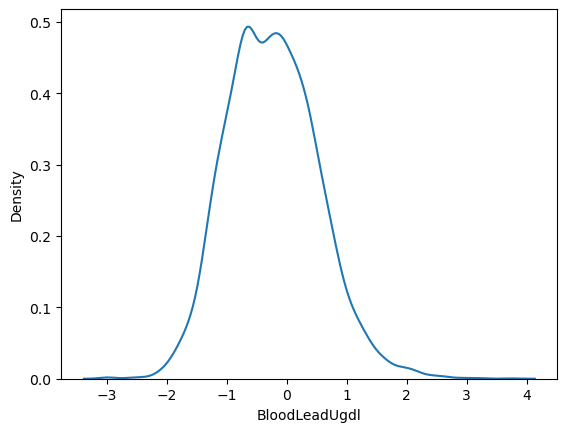

Sample mean: -0.2409632467254107
Sample standard deviation: 0.7600561387444652


In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

df = pd.read_csv('./data/nhanes_data_17_18.csv', low_memory= False)
df.head()

#x = np.log(df['BloodManganeseUgl'] ) # Looks log-normal
x = np.log(df['BloodLeadUgdl'] )
sns.kdeplot(x)
plt.show()

mu_hat = x.mean()
print(f'Sample mean: {mu_hat}')
sigma_hat= np.sqrt( x.var() )
print(f'Sample standard deviation: {sigma_hat}')

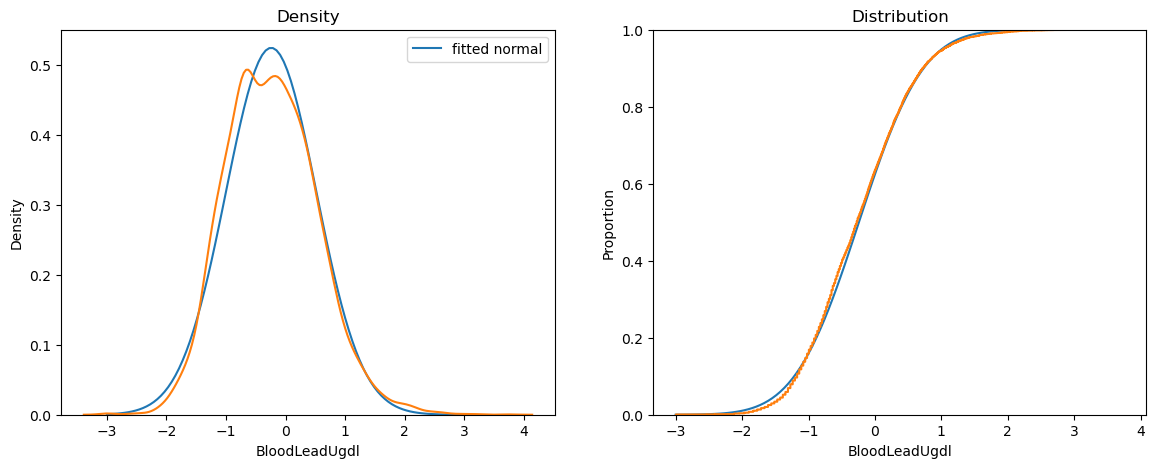

In [3]:
grid = np.linspace(-3,3,100)
cdf = sp.stats.norm.cdf(grid,loc=mu_hat,scale=sigma_hat)
pdf = sp.stats.norm.pdf(grid,loc=mu_hat,scale=sigma_hat)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='fitted normal')
sns.kdeplot(x=x,ax=axes[0],label='kde')
axes[0].set_title('Density')
sns.lineplot(x=grid,y=cdf,ax=axes[1])
sns.ecdfplot(x=x,ax=axes[1])
axes[1].set_title('Distribution')
plt.show()


## Prediction, Simulation, Inference
- We now have a fitted model: $ N(\hat{\mu} = -.241, \hat{\sigma} = .76)$
- We can predict the probability of having various levels of lead in one's blood
- We can take draws from the fitted distribution to simulate a population of similar
- We can use the bootstrap to determine the sampling distribution of $\hat{\mu}$ and $\hat{\sigma}$

In [4]:
## Predict probabilities:
prediction_values = np.array( (-2,-1,0,1,3) )
F_hat = sp.stats.norm.cdf(prediction_values,loc=mu_hat,scale=sigma_hat)
print(F_hat)

[0.01032424 0.15898    0.6243909  0.94873666 0.99998996]


[Text(0.5, 1.0, 'KDE of a Random Sample')]

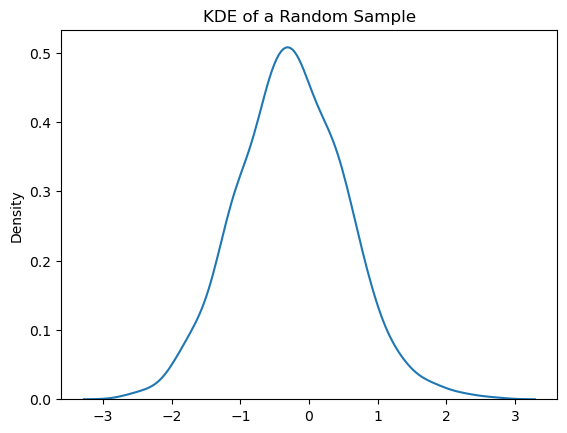

In [5]:
## Simulate a sample:
sample = sp.stats.norm.rvs(loc=mu_hat,scale=sigma_hat,size=1000,random_state=100)
sns.kdeplot(sample).set(title='KDE of a Random Sample')

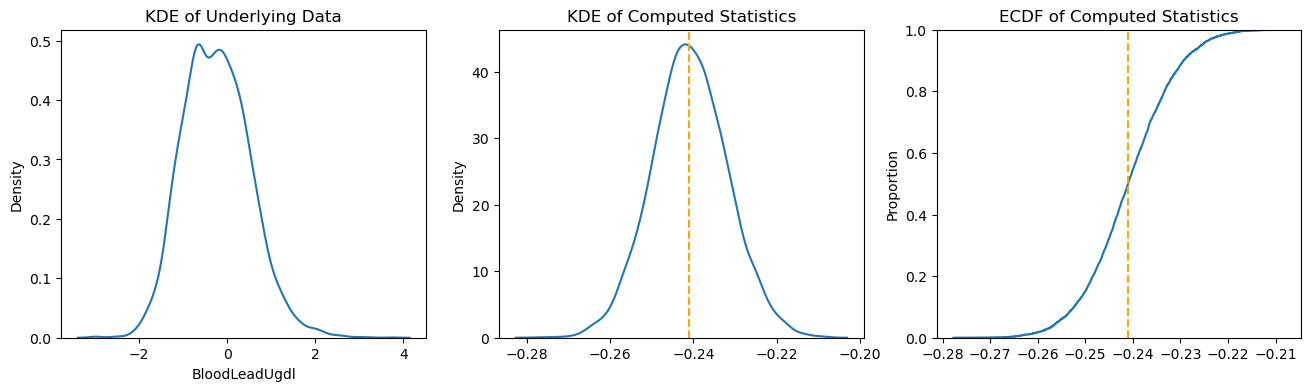

In [6]:
## Bootstrapping:
x = x.dropna()
estimates = [np.mean(x.sample(frac=1.0,replace=True)) for s in range(5000)] # One-line bootstrap of mu_hat

fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data')
sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
axes[1].axvline(x=np.mean(x), color='orange', linestyle='--')
sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
axes[2].axvline(x=np.mean(x), color='orange', linestyle='--')
plt.show()

## The Likelihood, in General
- In general, you specify the density of the **error** term, for some model. It could be additive, as $y_i = \mu + \sigma \varepsilon_i$, or multiplicative, $t_i = \lambda \varepsilon_i$, or nonlinear, $y_i = g(\theta) + \varepsilon_i$
- Then the **likelihood function** is the joint density of the error terms, by independence:
$$
f(\varepsilon_1, ..., \varepsilon_n) = \prod_{i=1}^n f(\varepsilon_i)
$$
- Substitute in your model:
$$
\prod_{i=1}^n f(\varepsilon_i) = \prod_{i=1}^n f \left( \frac{y_i - g(\theta)}{\sigma} \right) 
$$

- Take the log to convert to addition:
$$
\ell(\theta) = \sum_{i=1}^N \log \left( f \left( \frac{y_i - g(\theta)}{\sigma} \right) \right)
$$
- The likelihood and log-likelihood capture our ideas about how the error shapes observation

## Example 2: Exponential Distribution and Arrival/Survival
- Let's do something slightly different; in some ways easier
- Suppose we're thinking about time or duration: $t_i = \lambda \varepsilon_i$. So our observed time $t_i$ is a parameter $\lambda$ times the shock, $\varepsilon_i$
- If we model this as an exponential distributed random variable with support on $[0,\infty)$, we get
$$
L(\lambda) = \prod_{i=1}^n \frac{1}{\lambda} e^{- t_i / \lambda}
$$
- Taking logs yields
$$
\ell(\lambda) = \sum_{i=1}^n - \frac{t_i}{\lambda} - \log(\lambda)
$$


## Example 2: Exponential Distribution and Arrival/Survival
- Take a derivative to maximize:
$$
\ell'(\hat{\lambda}) = \sum_{i=1}^n \frac{t_i}{\hat{\lambda}^2} - \dfrac{n}{\hat{\lambda}} = 0
$$
- And the maximum likelihood estimator is:
$$
\hat{\lambda} = \dfrac{\sum_{i=1}^n t_i}{n}
$$

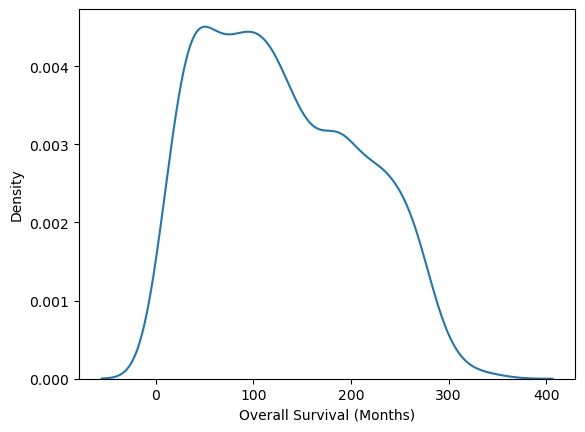

In [7]:
import pandas as pd 
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


df = pd.read_csv('./data/metabric.csv', low_memory= False)

x = df['Overall Survival (Months)'] 
sns.kdeplot(x)
plt.show()

In [8]:
lambda_hat = x.mean()
print(f'Sample mean: {lambda_hat}')

Sample mean: 129.09429138744105


## Example 2: Fit

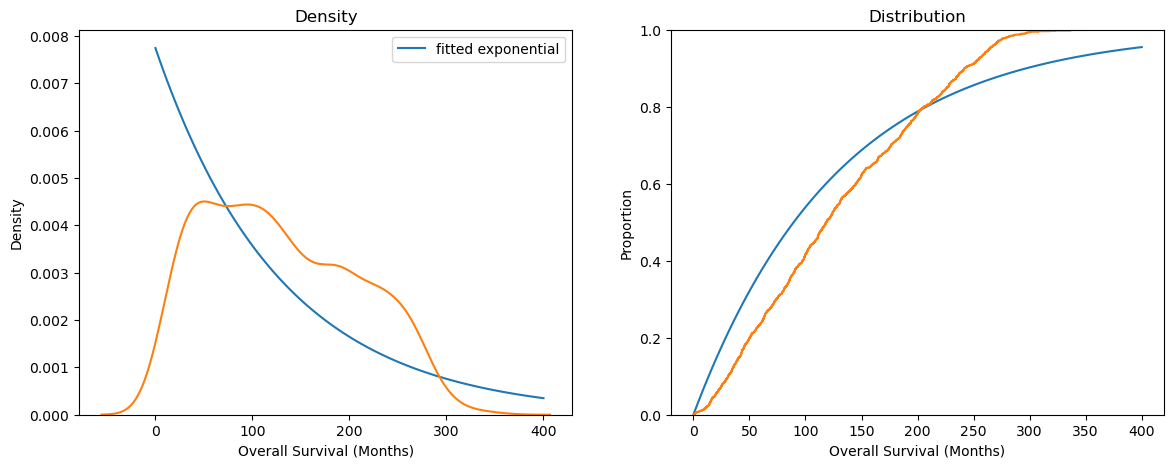

In [9]:
grid = np.linspace(0,400,100)
cdf = sp.stats.expon.cdf(grid,scale=lambda_hat)
pdf = sp.stats.expon.pdf(grid,scale=lambda_hat)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='fitted exponential')
sns.kdeplot(x=x,ax=axes[0],label='kde')
axes[0].set_title('Density')
sns.lineplot(x=grid,y=cdf,ax=axes[1])
sns.ecdfplot(x=x,ax=axes[1])
axes[1].set_title('Distribution')
plt.show()


In [10]:
## Predict probabilities:
prediction_values = np.array( (50,100,150,300) )
F_hat = sp.stats.expon.cdf(prediction_values,scale=lambda_hat)
print(F_hat)

[0.32112197 0.53912462 0.68712183 0.90210725]


[Text(0.5, 1.0, 'KDE of a Random Sample')]

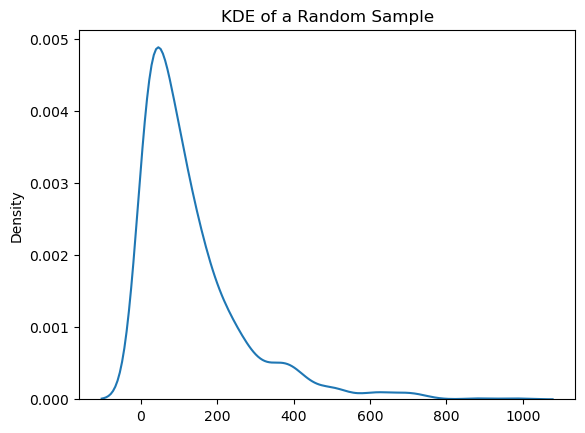

In [11]:
## Simulate a sample:
sample = sp.stats.expon.rvs(scale=lambda_hat,size=1000,random_state=100)
sns.kdeplot(sample).set(title='KDE of a Random Sample')

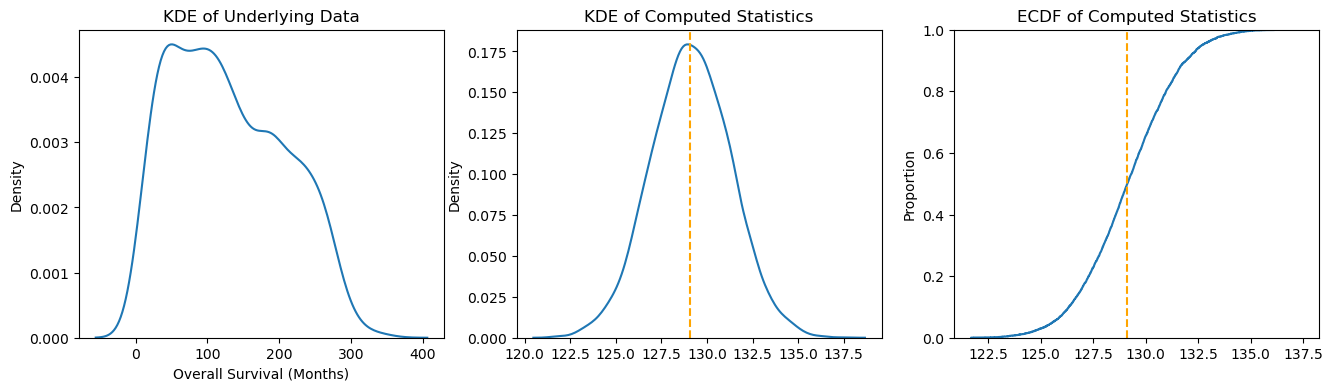

In [12]:
## Bootstrapping:
x = x.dropna()
estimates = [np.mean(x.sample(frac=1.0,replace=True)) for s in range(5000)] # One-line bootstrap of mu_hat

fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data')
sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
axes[1].axvline(x=np.mean(x), color='orange', linestyle='--')
sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
axes[2].axvline(x=np.mean(x), color='orange', linestyle='--')
plt.show()

## Example 2: Arrival/Duration/Survival Analysis
- This is a primitive version of the Proportional Hazards model (we're not using any covariates, non-linear functions of time aren't included as features)
- Did it work? Sort of: The random sample illustrates how there's too much "weight in the tail", and there are unrealistic life spans (800 months = 83 years)
- We can definitely build better models, but we're only using one parameter here

## Example 3: Binary Outcome
- Imagine that we observe $y_i = 1$ when 
$$\mu + \varepsilon_i > 0,$$
and $y_i=0$ when 
$$\mu + \varepsilon_i \le 0$$

- We call $L_i = \mu + \varepsilon_i$ a **latent variable** because it is unobserved: Only its sign is observed by the data scientist, through $y_i = 0$ or $y_i = 1$

## Example 3: Logistic Regression
- Then the probability we observe $y_i = 0$ corresponds to the event $L_i < 0$, or $\varepsilon_i < - \mu$. 
- Since $F(e) = pr[\varepsilon \le e]$, then $pr[\varepsilon \le - \mu] = F(-\mu) =pr[y=0]$
- Since $1-pr(A) = pr(\text{not }A)$, $pr[y=1] = 1-pr[y=0] = 1 - F(-\mu)$
- There is a clever and very common way to write this "switching":
$$
(1 - F(-\mu))^{y_i} \times F(-\mu)^{1-y_i}
$$

## Example 3: Logistic Regression
- To form the likelihood, take the product of the probabilities of observing each value of $y_i$:
$$
L(\mu) = \prod_{i=1}^n (1 - F(-\mu))^{y_i} \times F(-\mu)^{1-y_i}
$$
- And the log-likelihood is
$$
\ell(\mu) = \sum_{i=1}^n y_i \log\left(1 - F(-\mu)\right)+ (1-y_i) \log \left(  F(-\mu) \right)
$$
- Computer scientists call this the **binary cross entropy**

## Example 3: Logistic Regression
- Let's use the logistic distribution: $F(r) = 1/(1+e^{-r})$
- Remember logit magic: $f(r) = F(r)(1-F(r))$
- Maximizing our loglikelihood yields:
$$
\ell'(\hat{\mu}) = \sum_{i=1}^n y_i \dfrac{f(-\hat{\mu})}{1-F(-\hat{\mu})} - (1-y_i) \frac{f(-\hat{\mu})}{F(-\hat{\mu})}
$$
- But by logit magic:
$$
\ell'(\hat{\mu}) = \sum_{i=1}^n y_i F(-\mu) - (1-y_i) (1-F(-\mu))
$$
- Which is:
$$
\ell'(\hat{\mu}) = \sum_{i=1}^n  y_i -  (1 - F(-\mu)) =  0
$$

## Example 3: Logistic Regression
- Since $pr[y_i = 1] = 1-F(-\mu)$, this says we should find the $\hat{\mu}$ so that
$$
\frac{1}{n} \sum_{i=1}^n y_i = 1 - F(-\mu)
$$
The probability of a 1 should be equal to the sample proportion of 1's
- Again, we have a "sample mean is a function of parameters" kind of situation

## Example 3: Logistic Regression
- To keep the notation clean, let $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$. Then
\begin{alignat*}{2}
\bar{y} &=& 1 - \frac{1}{1+e^{--\mu}} \\
1 - \bar{y} &=& \frac{1}{1+e^{\mu}} \\
e^{\mu} &=& \frac{1}{1-\bar{y}} -1 \\
e^{\mu} &=& \frac{\bar{y}}{1-\bar{y}}\\
\hat{\mu} &=& \log \left( \frac{\bar{y}}{1-\bar{y}} \right)
\end{alignat*}
- Whew.

## Example 3: Survival Probability

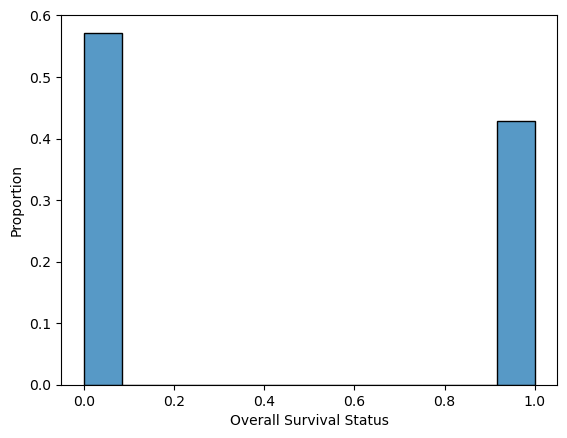

In [13]:
import pandas as pd 
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

df = pd.read_csv('./data/metabric.csv', low_memory= False)

y = df['Overall Survival Status'] 

y = y.replace({'0:LIVING':'1.0', '1:DECEASED':'0.0'})
y = pd.to_numeric(y,errors='coerce')

sns.histplot(y,stat='proportion')
plt.show()

In [14]:
mu_hat = np.log( y.mean()/(1-y.mean()))
print(f'mu_hat is: {mu_hat}')

pr_1 = 1 - 1/(1+np.exp(-(-mu_hat)))
print(f'Probability of a 1 is: {pr_1}')
print(f'Sample proportion of ones is: {y.mean()}')

mu_hat is: -0.2894196923503216
Probability of a 1 is: 0.42814594192107225
Sample proportion of ones is: 0.42814594192107225


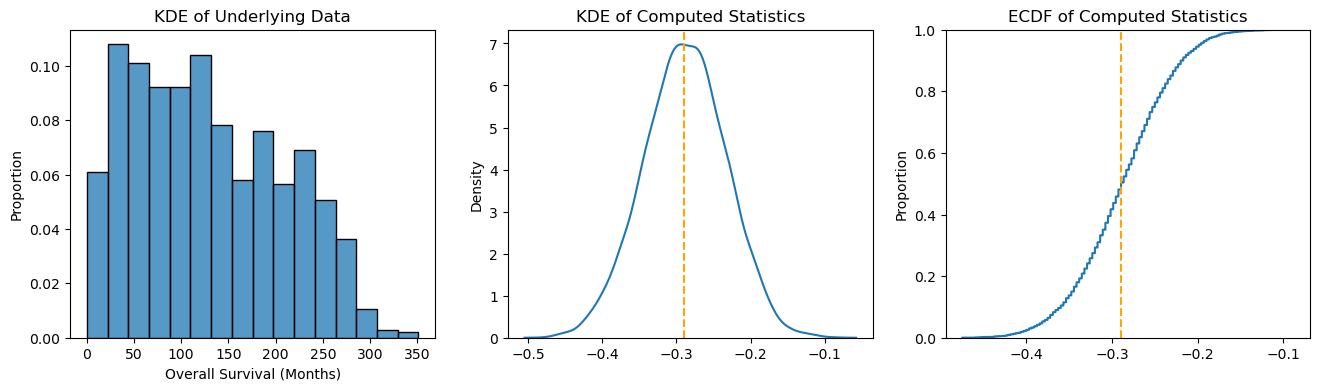

In [15]:
## Bootstrapping:
y = y.dropna()

def logit(z):
    return np.log( z.mean()/(1-z.mean()))

estimates = [logit(y.sample(frac=1.0,replace=True)) for s in range(5000)] # One-line bootstrap of mu_hat

fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
sns.histplot(x, stat='proportion',ax = axes[0]).set(title='KDE of Underlying Data')
sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
axes[1].axvline(x=logit(y), color='orange', linestyle='--')
sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
axes[2].axvline(x=logit(y), color='orange', linestyle='--')
plt.show()

## Incorporating Covariates
- We've seen cases with normal $(\mu, \sigma^2)$, exponential $\lambda$, and logistic $\mu$
- To incorporate covariates and get to machine learning, we replace the parameters of the distribution with functions of the data
- The combination of parameterization and likelihood gives us many of the frameworks that you are learning about in ML1 and ML2:
    - For the normal, we set $\mu = x \beta$, so that $y_i = x_i' \beta + \sigma \varepsilon_i$. This yields **linear regression**
    - For the logistic, we set $\mu = x \beta$, so that $L_i = x_i' \beta + \varepsilon_i$. This yields **logistic regression**
    - For the exponential, we set $\lambda = \exp \left( x_i' \beta \right)$, so that $\varepsilon_i = t_i \exp( -x_i' \beta)$. This yields the **proportional hazards survival model**

## Exercise:
- Show that any model/algorithm that minimizes the MSE or SSE implicitly assumes independently distributed Normal errors
- Show that any model/algorithm that minimizes the binary cross-entropy implicitly independently distributed logistic errors

## Maximum Likelihood Estimation
- So, now we have a framework for creating models and linking them to data:
    1. Model the **error term** explicitly with a parametric distribution, linking the model to data by way of the **parameters**
    2. Compute the joint density of observing the data (the likelihood)
    3. Maximize that density (the maximum likelihood estimator)

## Conclusion
- The expected value of our ECDF is the CDF, and of the KDE is the PDF: We've been estimating all along
- Maximum Likelihood Estimation (MLE) is probably the most powerful frequentist tool for deriving models and estimators from data
- The likelihood is a joint density, expressing the relative 
- To get our estimators, we say: "Great, let's pick our parameters to make observation of these data as likely as possible"
- Most of the methods you know of --- OLS, logistic regression, k-means clustering, etc. --- are just the MLEs for particular problems
- What's valuable about MLE is how it uncovers the hidden relationship between model, data, inference, and prediction
- We can bootstrap the sampling distribution of maximum likelihood estimators to do inference